<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [2]:
gensim.__version__

'3.8.1'

In [3]:
amazon = pd.read_csv('data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [4]:
amazon.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."


In [5]:
amazon['reviews.text']

0        I order 3 of them and one of the item is bad q...
1        Bulk is always the less expensive way to go fo...
2        Well they are not Duracell but for the price i...
3        Seem to work as well as name brand batteries a...
4        These batteries are very long lasting the pric...
                               ...                        
28327    I got 2 of these for my 8 yr old twins. My 11 ...
28328    I bought this for my niece for a Christmas gif...
28329    Very nice for light internet browsing, keeping...
28330    This Tablet does absolutely everything I want!...
28331    At ninety dollars, the expectionations are low...
Name: reviews.text, Length: 28332, dtype: object

In [7]:
amazon['reviews.text'].value_counts(normalize=True)[:50]

good                0.002118
great               0.001729
Good                0.001482
Great               0.001341
ok                  0.001165
Great price         0.001059
great price         0.000988
Excellent           0.000988
Great value         0.000953
good price          0.000812
great value         0.000777
Great price!        0.000635
good value          0.000600
good deal           0.000565
Great value.        0.000565
Great product       0.000529
As expected         0.000529
OK                  0.000529
Good deal           0.000529
Great deal          0.000529
Good batteries      0.000494
Good value          0.000494
great deal          0.000459
Great value!        0.000459
Great batteries.    0.000459
So far so good      0.000459
Good price          0.000459
Work great          0.000424
Good buy            0.000424
Great price.        0.000388
Good value.         0.000388
Great deal!         0.000388
as expected         0.000388
very good           0.000388
Great!        

In [17]:
STOPWORDS = set(STOPWORDS).union(set(['batteries', 'battery', 'I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [18]:
amazon['tokens'] = amazon['reviews.text'].apply(tokenize)

In [19]:
amazon[['reviews.text', 'tokens']][:10]

,reviews.text,tokens
0,I order 3 of them and one of the item is bad q...,"[order, item, bad, quality, missing, backup, s..."
1,Bulk is always the less expensive way to go fo...,"[bulk, expensive, way, products, like]"
2,Well they are not Duracell but for the price i...,"[duracell, price, happy]"
3,Seem to work as well as name brand batteries a...,"[work, brand, better, price]"
4,These batteries are very long lasting the pric...,"[long, lasting, price, great]"
5,Bought a lot of batteries for Christmas and th...,"[bought, lot, christmas, amazonbasics, cell, g..."
6,ive not had any problame with these batteries ...,"[ive, problame, ordered, past, pleased]"
7,Well if you are looking for cheap non-recharge...,"[looking, cheap, non, rechargeable, perfect]"
8,These do not hold the amount of high power jui...,"[hold, high, power, juice, like, energizer, du..."
9,AmazonBasics AA AAA batteries have done well b...,"[amazonbasics, aa, aaa, appear, good, shelf, l..."


In [21]:
amazon['tokens'][0][0:10]

['order',
 'item',
 'bad',
 'quality',
 'missing',
 'backup',
 'spring',
 'pcs',
 'aluminum',
 'work']

In [29]:
id2word = corpora.Dictionary(amazon['tokens'])

In [30]:
id2word.token2id['amazonbasics']

23

In [31]:
len(id2word.keys())

9617

In [32]:
id2word.filter_extremes(no_below=5, no_above=0.95)

In [33]:
len(id2word.keys())

3577

In [34]:
# a bag of words(bow) representation of our corpus

corpus = [id2word.doc2bow(text) for text in amazon['tokens']]

In [42]:
corpus[200][:10]

[(11, 1),
 (93, 1),
 (98, 1),
 (408, 1),
 (444, 1),
 (462, 1),
 (642, 1),
 (678, 1),
 (679, 1),
 (680, 1)]

In [46]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 20,
                   passes=10,
                   workers=12
                  )

In [47]:
lda.print_topics()

[(0,
  '0.077*"great" + 0.061*"price" + 0.051*"long" + 0.017*"nice" + 0.014*"good" + 0.013*"time" + 0.010*"keyboard" + 0.010*"tablet" + 0.010*"ipad" + 0.010*"lot"'),
 (1,
  '0.040*"tablet" + 0.037*"loves" + 0.036*"son" + 0.031*"games" + 0.028*"learning" + 0.020*"expected" + 0.018*"daughter" + 0.018*"great" + 0.016*"bought" + 0.014*"year"'),
 (2,
  '0.031*"great" + 0.023*"tablet" + 0.023*"product" + 0.021*"books" + 0.019*"good" + 0.017*"kindle" + 0.013*"use" + 0.012*"looking" + 0.012*"reading" + 0.012*"perfect"'),
 (3,
  '0.060*"old" + 0.054*"tablet" + 0.053*"year" + 0.051*"easy" + 0.043*"use" + 0.031*"loves" + 0.022*"kids" + 0.020*"great" + 0.019*"perfect" + 0.019*"case"'),
 (4,
  '0.046*"tablet" + 0.028*"great" + 0.025*"movies" + 0.021*"use" + 0.021*"music" + 0.020*"watch" + 0.020*"play" + 0.016*"games" + 0.016*"apps" + 0.015*"love"'),
 (5,
  '0.136*"great" + 0.069*"tablet" + 0.058*"works" + 0.024*"price" + 0.017*"love" + 0.016*"loves" + 0.015*"good" + 0.015*"got" + 0.013*"purchased" 

In [48]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
great price long nice good

------ Topic 1 ------
tablet loves son games learning

------ Topic 2 ------
great tablet product books good

------ Topic 3 ------
old tablet year easy use

------ Topic 4 ------
tablet great movies use music

------ Topic 5 ------
great tablet works price love

------ Topic 6 ------
love kids games kindle great

------ Topic 7 ------
good great price value use

------ Topic 8 ------
tablet purchased kindle like apps

------ Topic 9 ------
bought loves christmas gift tablet

------ Topic 10 ------
work like use device fine

------ Topic 11 ------
kindle price great deal new

------ Topic 12 ------
great easy use screen product

------ Topic 13 ------
tablet reading great web kindle

------ Topic 14 ------
books kindle read use buy

------ Topic 15 ------
tablet great store apps price

------ Topic 16 ------
tablet better great price good

------ Topic 17 ------
good price brand long work

------ Topic 18 ------
time like kids apps devi

In [49]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [50]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.224803  0.166979       1        1  13.467023
3     -0.189574  0.065088       2        1   6.425098
12     0.021585 -0.113880       3        1   5.887283
19     0.170690  0.079625       4        1   5.697332
4     -0.021752 -0.100983       5        1   5.505751
10     0.125608 -0.029255       6        1   5.383245
6     -0.161163  0.036784       7        1   5.023222
0      0.173896  0.033600       8        1   4.931738
9     -0.178664  0.150318       9        1   4.927970
11     0.046467 -0.015859      10        1   4.856475
14    -0.048361 -0.035319      11        1   4.827140
7      0.050654 -0.004352      12        1   4.440176
15    -0.007558 -0.055996      13        1   4.100175
13    -0.031586 -0.123584      14        1   4.010960
5     -0.015142 -0.016677      15        1   3.991543
16     0.056865 -0.051875      16        1   3.873063
18    -0.002130 -0.016370      17        1   3.651621
8     -0.048503 -0.045900      18        1   3.208075
1     -0.134463  0.098192      19        1   2.968080
2     -0.031670 -0.020534      20        1   2.824021, topic_info=        Term         Freq        Total Category  logprob  loglift
31      good  5440.000000  5440.000000  Default  30.0000  30.0000
19     great  8725.000000  8725.000000  Default  29.0000  29.0000
1853   loves  2283.000000  2283.000000  Default  28.0000  28.0000
2428  tablet  7538.000000  7538.000000  Default  27.0000  27.0000
16     price  4706.000000  4706.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
103     need    50.971977   949.032898  Topic20  -5.0901   0.6428
86     light    46.890865   647.743225  Topic20  -5.1736   0.9413
881     gift    48.306839  1096.686035  Topic20  -5.1438   0.4445
25    bought    48.670750  3164.375488  Topic20  -5.1363  -0.6076
16     price    48.211712  4706.701172  Topic20  -5.1458  -1.0141

[1526 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
53        1  0.805394    aa
53        4  0.167504    aa
53        6  0.002295    aa
53        8  0.006884    aa
53       10  0.004589    aa
...     ...       ...   ...
2980      9  0.016396   äôt
2980     11  0.016396   äôt
2980     19  0.032791   äôt
3576      3  0.743646  äôve
3576      9  0.106235  äôve

[6686 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 4, 13, 20, 5, 11, 7, 1, 10, 12, 15, 8, 16, 14, 6, 17, 19, 9, 2, 3])

In [51]:
lda[corpus[0]]

[(13, 0.12599827), (17, 0.7839224)]

In [52]:
distro = [lda[d] for d in corpus]

In [53]:
distro[0]

[(13, 0.12599646), (17, 0.7839243)]

In [54]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [55]:
len(new_distro)

28332

In [56]:
df = pd.DataFrame.from_records(new_distro)
df.columns = topics

In [57]:
df.head()

,great price long nice good,tablet loves son games learning,great tablet product books good,old tablet year easy use,tablet great movies use music,great tablet works price love,love kids games kindle great,good great price value use,tablet purchased kindle like apps,bought loves christmas gift tablet,work like use device fine,kindle price great deal new,great easy use screen product,tablet reading great web kindle,books kindle read use buy,tablet great store apps price,tablet better great price good,good price brand long work,time like kids apps device,great expensive brands work love
0,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.125985,0.0000,0.783936,NaN,NaN,NaN,NaN
1,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,NaN,0.841663,NaN,NaN,NaN
2,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.012500,0.0125,0.762493,0.012500,0.0125,0.0125,0.0125
3,0.010000,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.010000,0.0100,0.809999,0.010000,0.0100,0.0100,0.0100
4,0.809999,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.010000,0.0100,0.010000,0.010000,0.0100,0.0100,0.0100


In [61]:
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [62]:
%%time
import warnings
warnings.filterwarnings('ignore')
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=2, 
                                                        limit=20, 
                                                        step=2,
                                                        passes=10)

CPU times: user 15min 28s, sys: 6min 56s, total: 22min 24s
Wall time: 25min 5s


In [63]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [64]:
topic_coherence.head()

,num_topics,coherence_score
0,2,-2.524830
1,4,-2.527303
2,6,-2.555346
3,8,-2.600793
4,10,-2.612981


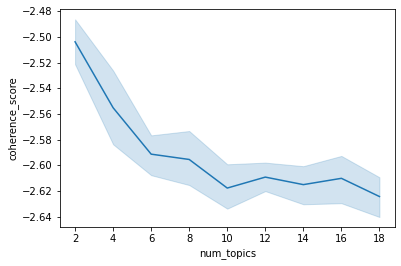

In [65]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [69]:
# Print the coherence scores
for m, cv in zip(list(range(3,20,2)), coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv)

Num Topics = 3  has Coherence Value of {'num_topics': 2, 'coherence_score': -2.52483008260748}
Num Topics = 5  has Coherence Value of {'num_topics': 4, 'coherence_score': -2.527302745528119}
Num Topics = 7  has Coherence Value of {'num_topics': 6, 'coherence_score': -2.555346449217422}
Num Topics = 9  has Coherence Value of {'num_topics': 8, 'coherence_score': -2.6007927736926035}
Num Topics = 11  has Coherence Value of {'num_topics': 10, 'coherence_score': -2.612981495450344}
Num Topics = 13  has Coherence Value of {'num_topics': 12, 'coherence_score': -2.618143184669312}
Num Topics = 15  has Coherence Value of {'num_topics': 14, 'coherence_score': -2.594225166386832}
Num Topics = 17  has Coherence Value of {'num_topics': 16, 'coherence_score': -2.60804253833105}
Num Topics = 19  has Coherence Value of {'num_topics': 18, 'coherence_score': -2.6169588218661435}


## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling